In [158]:
#There are 2 ratings which should i choose?
#I'm not sure what to do when .describe() with the ones like theme_id, cuz .describe() gives their mean and std etc. TT... so for now i just omitted them from my .describe()

In [133]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [134]:
legoData = pd.read_csv("merged_lego_dataset.csv")
legoData.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,Box,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,Box,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,Box,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,Box,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,Box,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902


# Categorical Predictors :

In [135]:
categoricalData = legoData[['set_id','set_name','release_year','theme_id','set_rating','retire_month','Packaging','Availability','Rating']]
categoricalData

,set_id,set_name,release_year,theme_id,set_rating,retire_month,Packaging,Availability,Rating
0,60244-1,Police Helicopter Transport,2020,61,4.6,Oct-21,Box,Retail,0.0
1,60248-1,Fire Helicopter Response,2020,58,4.4,Nov-21,Box,Retail,2.3
2,60252-1,Construction Bulldozer,2020,56,4.5,Nov-21,Box,Retail,3.8
3,60254-1,Race Boat Transporter,2020,52,4.6,Nov-21,Box,Retail,4.0
4,60258-1,Tuning Workshop,2020,52,4.6,Nov-21,Box,Retail,4.1
...,...,...,...,...,...,...,...,...,...
717,75142-1,Homing Spider Droid,2016,158,4.8,Jun-17,Box,Retail,3.7
718,75145-1,Eclipse Fighter,2016,158,4.7,Nov-17,Box,Retail,3.8
719,75146-1,Star Wars Advent Calendar 2016,2016,209,4.5,Nov-16,Box,Retail,3.9
720,75147-1,StarScavenger,2016,158,4.7,Dec-17,Box,Retail,3.5


## Exploratory Data Analysis

<Axes: xlabel='Current_Price', ylabel='Count'>

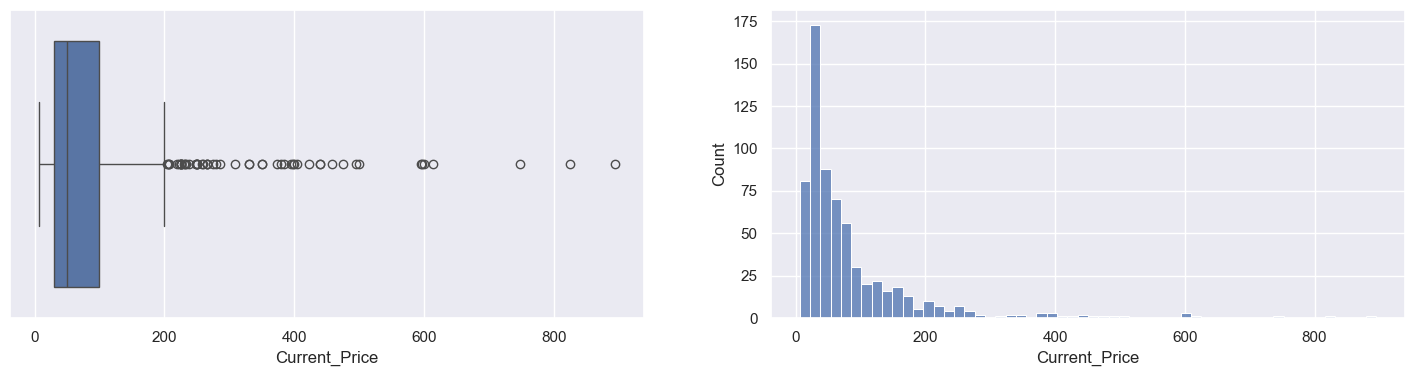

In [136]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = legoData['Current_Price'], orient = "h", ax = axes[0])
sb.histplot(data = legoData['Current_Price'], ax = axes[1])

In [137]:
categoricalData[['set_id', 'set_name','retire_month', 'Packaging', 'Availability']].describe()

,set_id,set_name,retire_month,Packaging,Availability
count,722,722,722,722,722
unique,722,718,66,4,4
top,60244-1,Police Pursuit,Nov-17,Box,Retail
freq,1,2,58,708,607


## Visualising Categorical Data

### Release Year

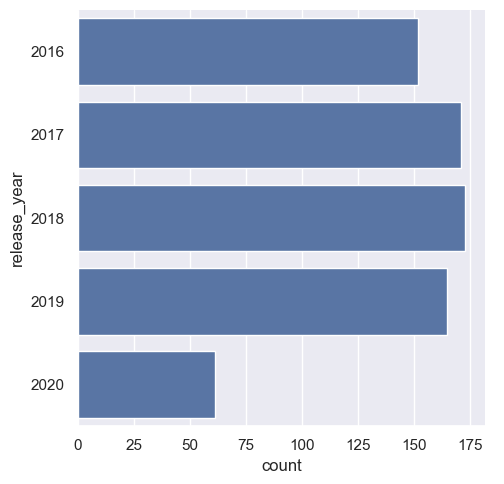

In [138]:
sb.catplot(y = 'release_year', data = legoData, kind = "count")

### Theme ID

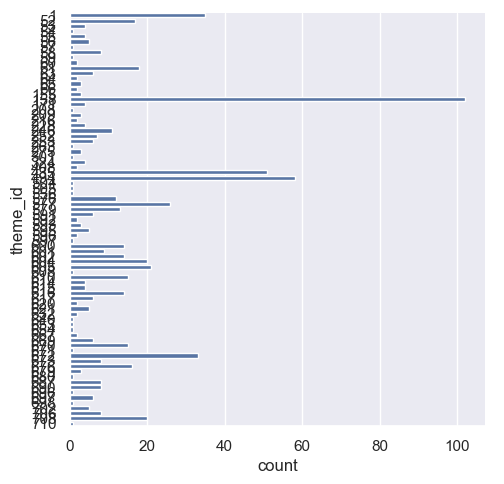

In [139]:
sb.catplot(y = 'theme_id', data = legoData, kind = "count")

### Set Rating

<Axes: xlabel='set_rating', ylabel='Count'>

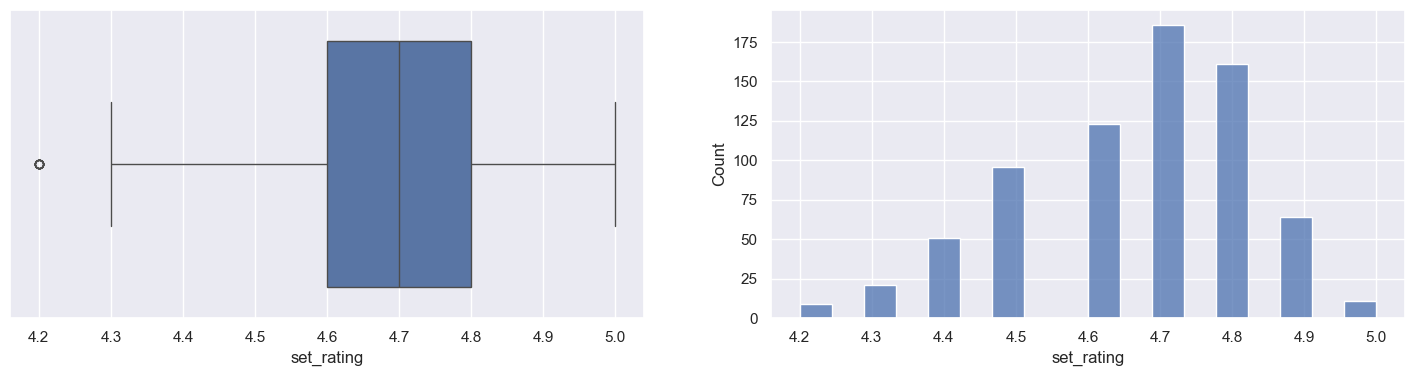

In [140]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = legoData['set_rating'], orient = "h", ax = axes[0])
sb.histplot(data = legoData['set_rating'], ax = axes[1])

### Retire Month

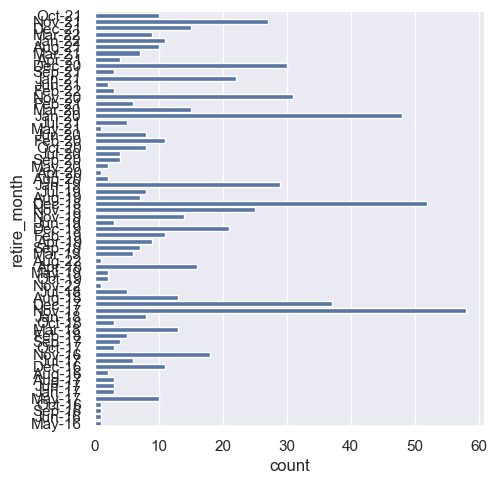

In [141]:
sb.catplot(y = 'retire_month', data = legoData, kind = "count")

### Packaging

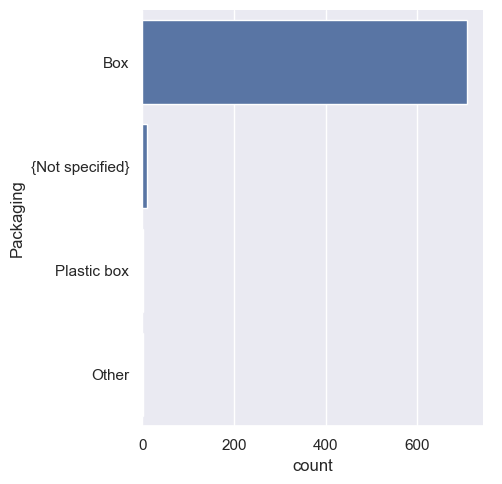

In [142]:
sb.catplot(y = 'Packaging', data = legoData, kind = "count")

### Availability

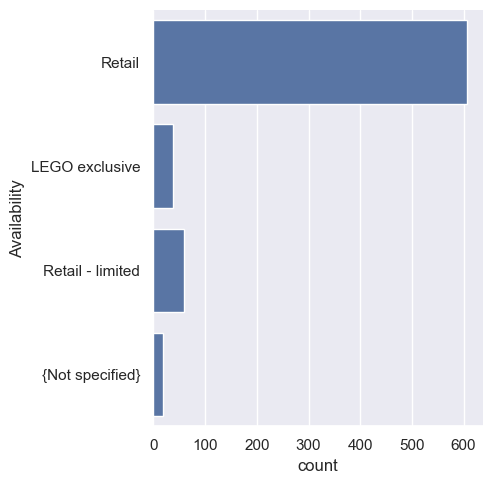

In [143]:
sb.catplot(y = 'Availability', data = legoData, kind = "count")

### Rating

<Axes: xlabel='Rating', ylabel='Count'>

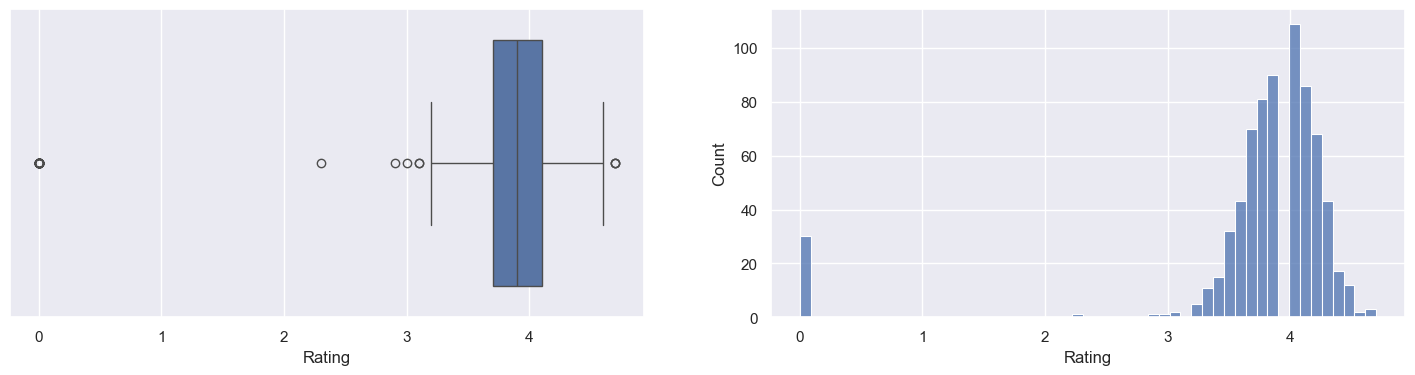

In [144]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = legoData['Rating'], orient = "h", ax = axes[0])
sb.histplot(data = legoData['Rating'], ax = axes[1])

## Visualising Categorical Data against Retire Price

### Release Year Vs Current Price

<Axes: xlabel='release_year', ylabel='Current_Price'>

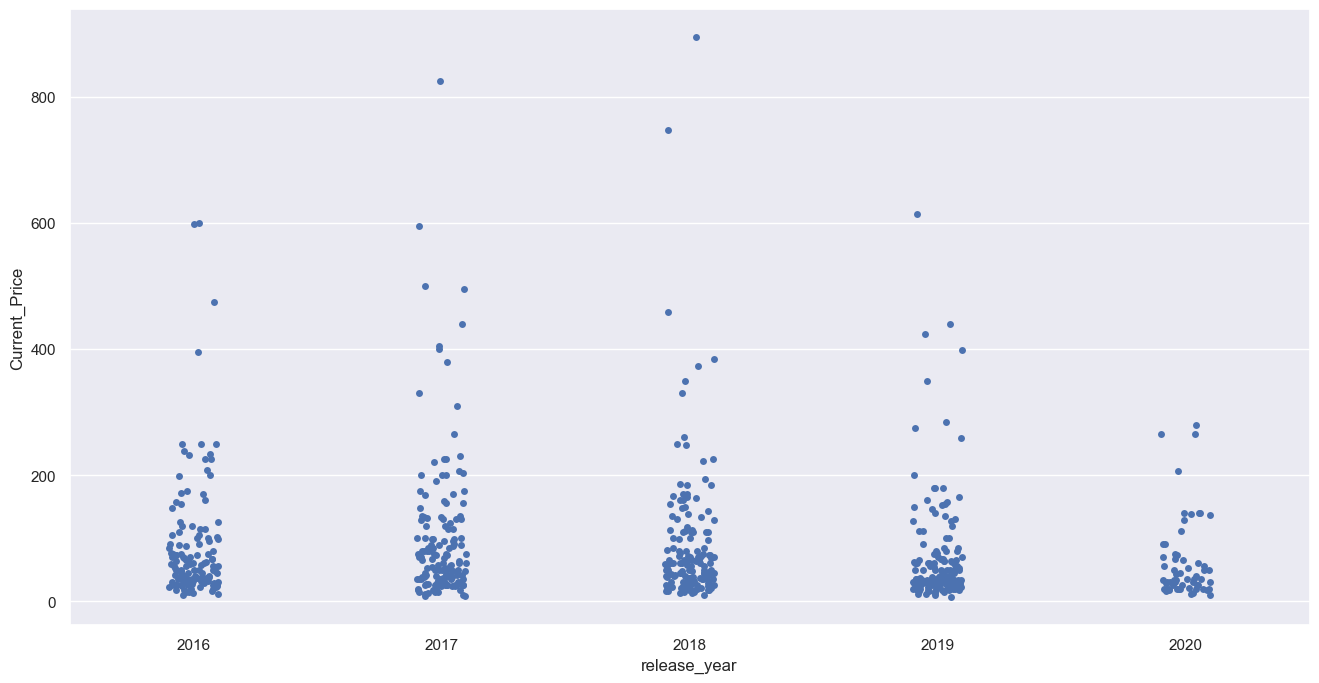

In [145]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'release_year', y = 'Current_Price', data = legoData)

<Axes: xlabel='current_price_category', ylabel='release_year'>

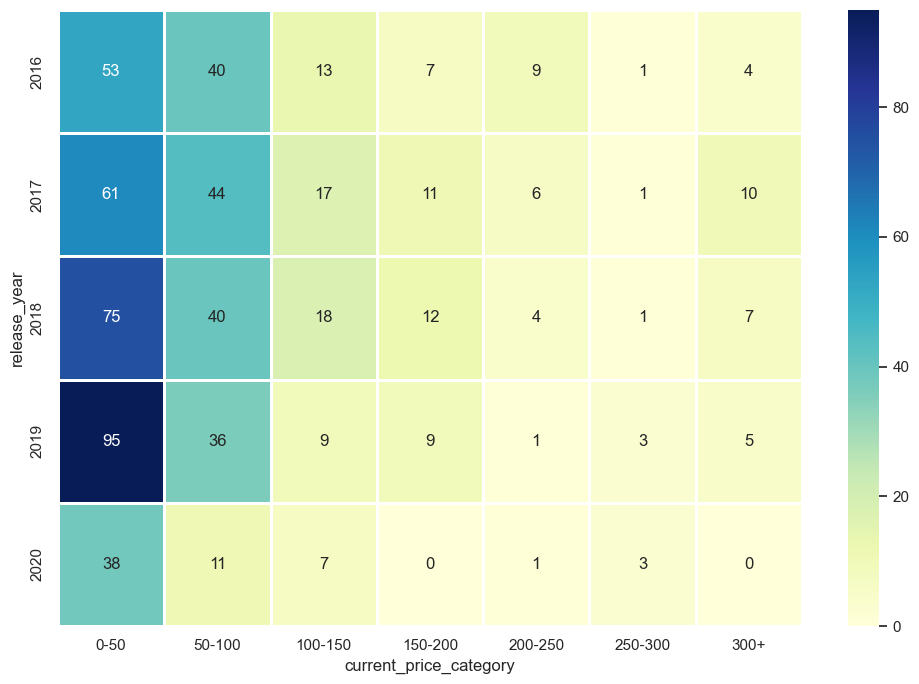

In [146]:
current_price_bins = [0, 50, 100, 150, 200, 250, 300, np.inf]  # Define your own bin edges as needed
current_price_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']

legoData['current_price_category'] = pd.cut(legoData['Current_Price'], bins=current_price_bins, labels=current_price_labels, right=False)

heatmap_pivot = legoData.pivot_table(index='release_year', columns='current_price_category', values='set_id', aggfunc='count', observed=False)

plt.figure(figsize=(12, 8))
sb.heatmap(data=heatmap_pivot, linewidths=1, annot=True, fmt='g', annot_kws={"size": 12}, cmap="YlGnBu")

### Theme ID Vs Current Price

<Axes: xlabel='theme_id', ylabel='Current_Price'>

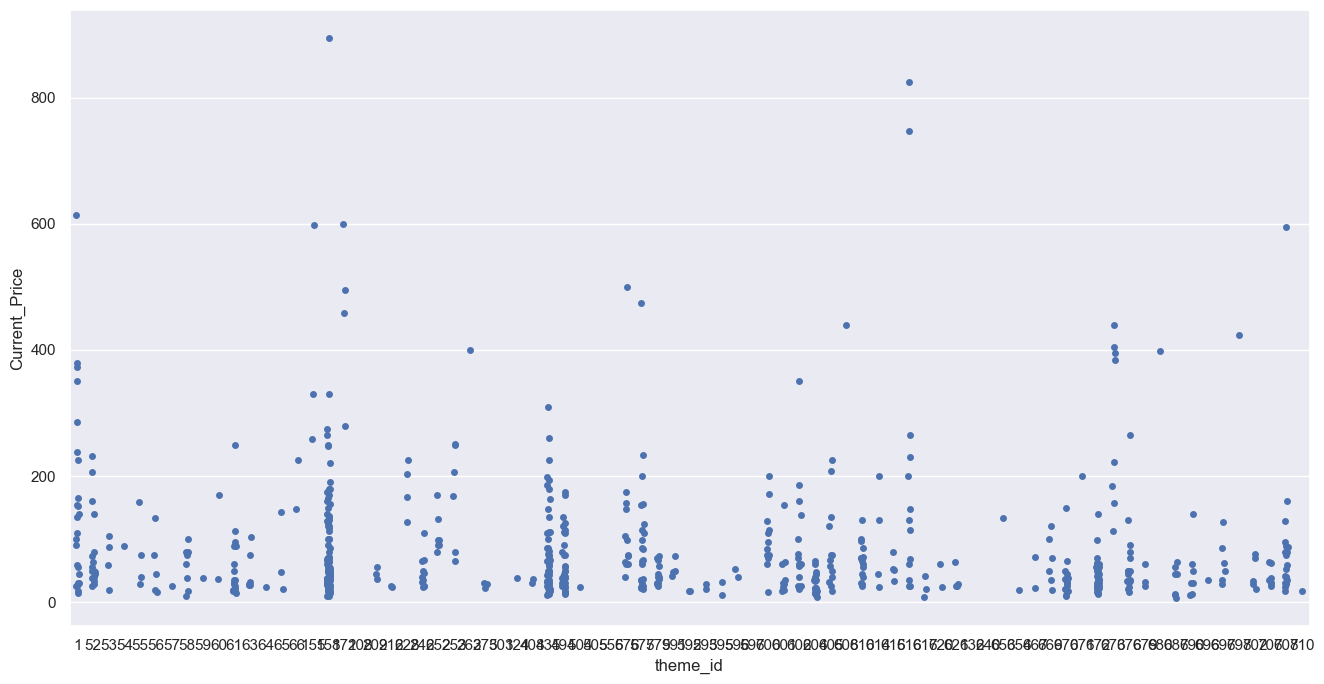

In [147]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'theme_id', y = 'Current_Price', data = legoData)

### Set Rating Vs Retire Price

<Axes: xlabel='set_rating', ylabel='Current_Price'>

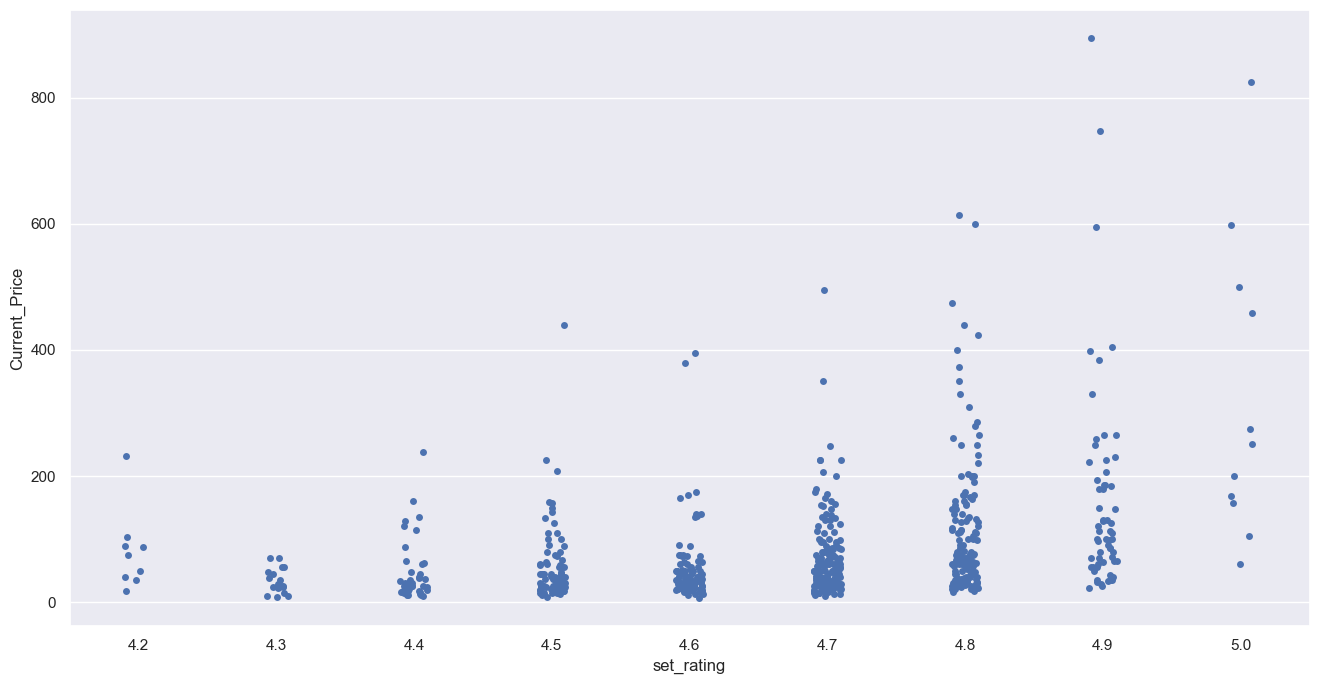

In [148]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'set_rating', y = 'Current_Price', data = legoData)

<Axes: xlabel='price_category', ylabel='set_rating'>

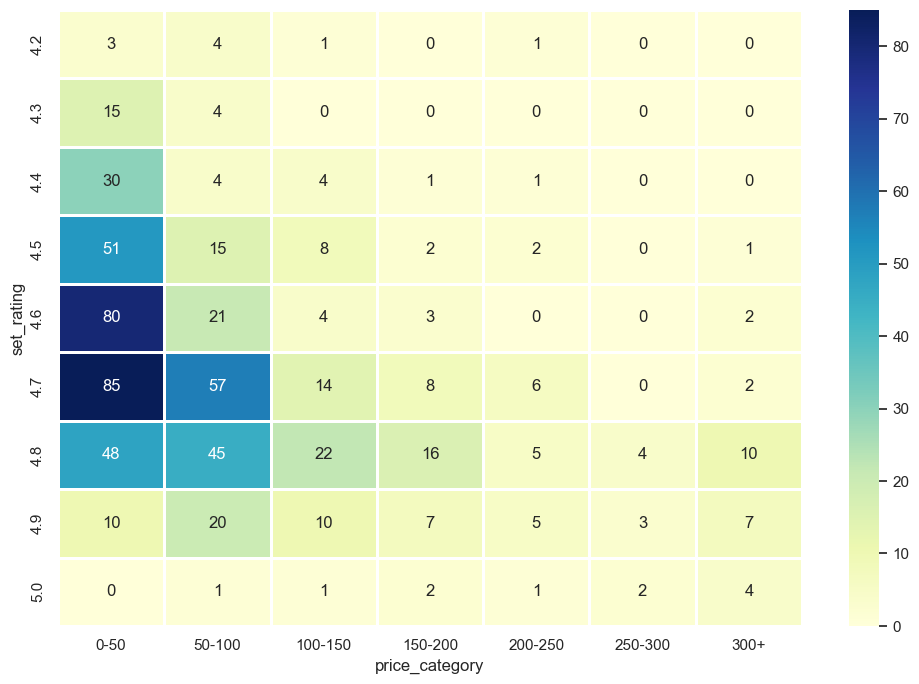

In [149]:
price_bins = [0, 50, 100, 150, 200, 250, 300, np.inf]
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']

legoData['price_category'] = pd.cut(legoData['Current_Price'], bins=price_bins, labels=price_labels, right=False)

heatmap_pivot = legoData.pivot_table(index='set_rating', columns='price_category', values='set_id', aggfunc='count', observed=False)

plt.figure(figsize=(12, 8))
sb.heatmap(data=heatmap_pivot, linewidths=1, annot=True, fmt='g', annot_kws={"size": 12}, cmap="YlGnBu")

### Rating Vs Current Price (2nd version of Rating)

<Axes: xlabel='Rating', ylabel='Current_Price'>

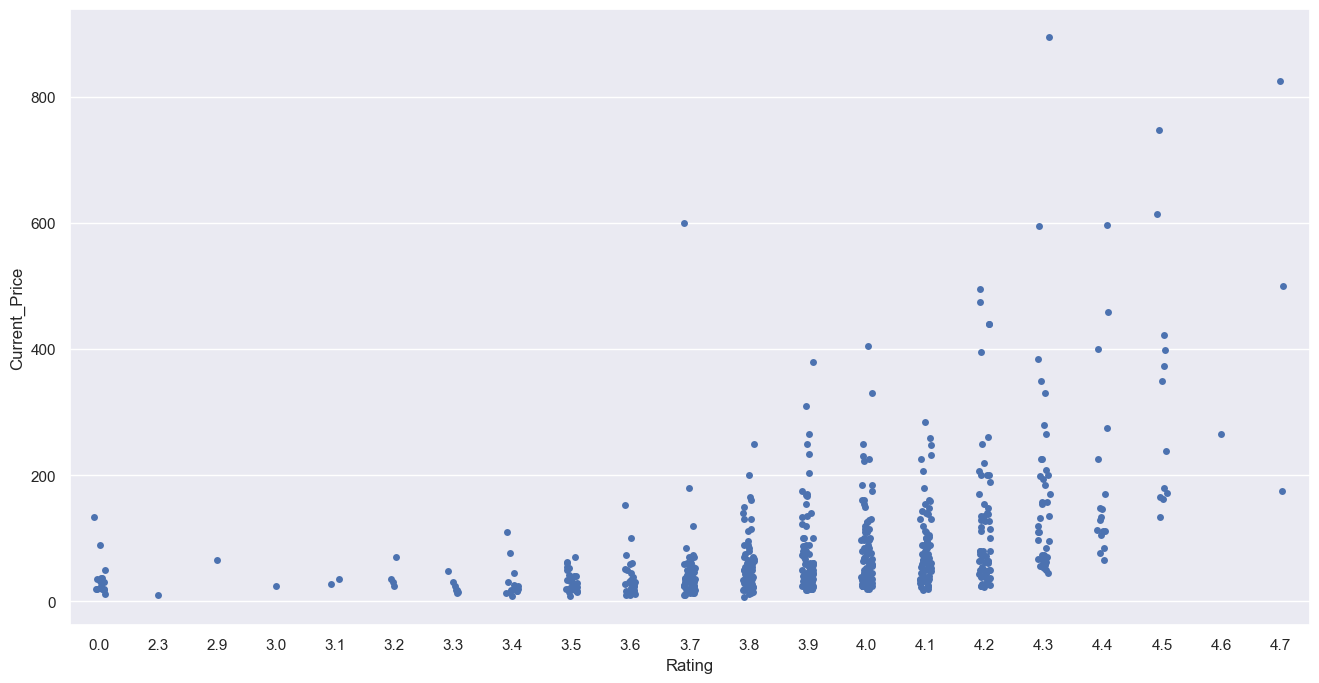

In [150]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Rating', y = 'Current_Price', data = legoData)

<Axes: xlabel='price_category', ylabel='rating_category'>

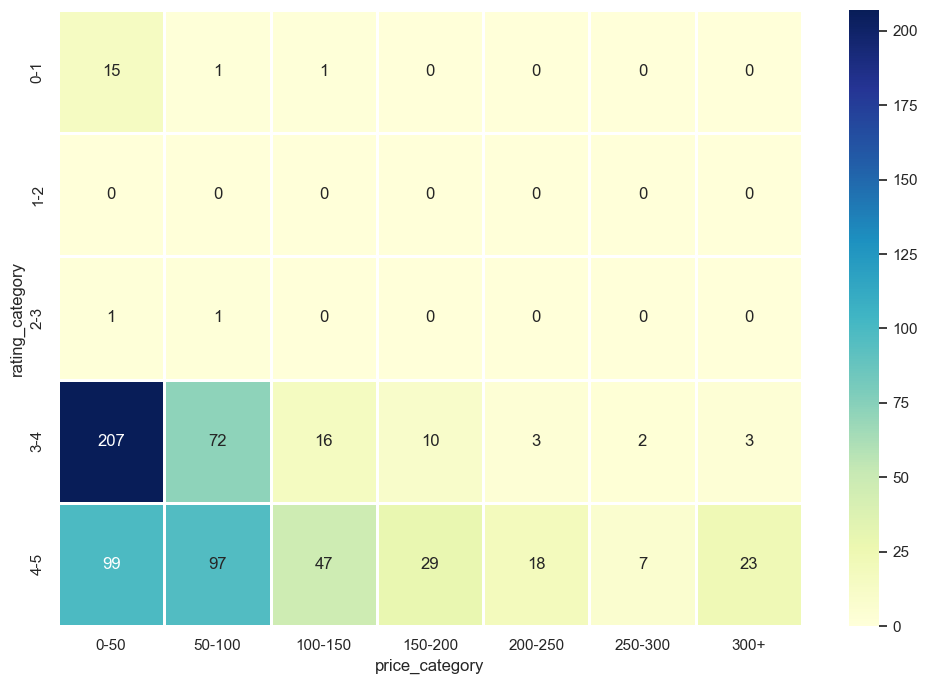

In [151]:
rating_bins = [0, 1, 2, 3, 4, 5]
rating_labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

legoData['rating_category'] = pd.cut(legoData['Rating'], bins=rating_bins, labels=rating_labels, right=False)

heatmap_pivot = legoData.pivot_table(index='rating_category', columns='price_category', values='set_id', aggfunc='count', observed=False)

plt.figure(figsize=(12, 8))
sb.heatmap(data=heatmap_pivot, linewidths=1, annot=True, fmt='g', annot_kws={"size": 12}, cmap="YlGnBu")

### Retire Month Vs Current Price

<Axes: xlabel='retire_month', ylabel='Current_Price'>

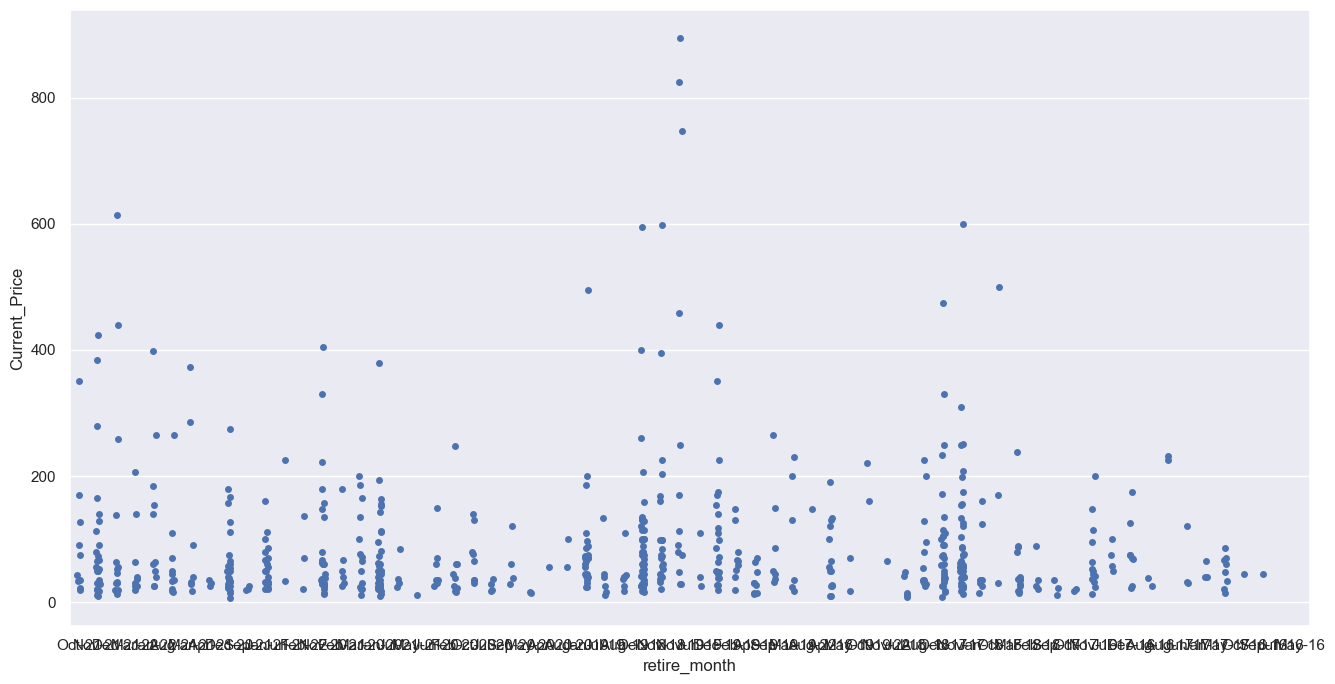

In [152]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'retire_month', y = 'Current_Price', data = legoData)

<Axes: xlabel='price_category', ylabel='retire_year'>

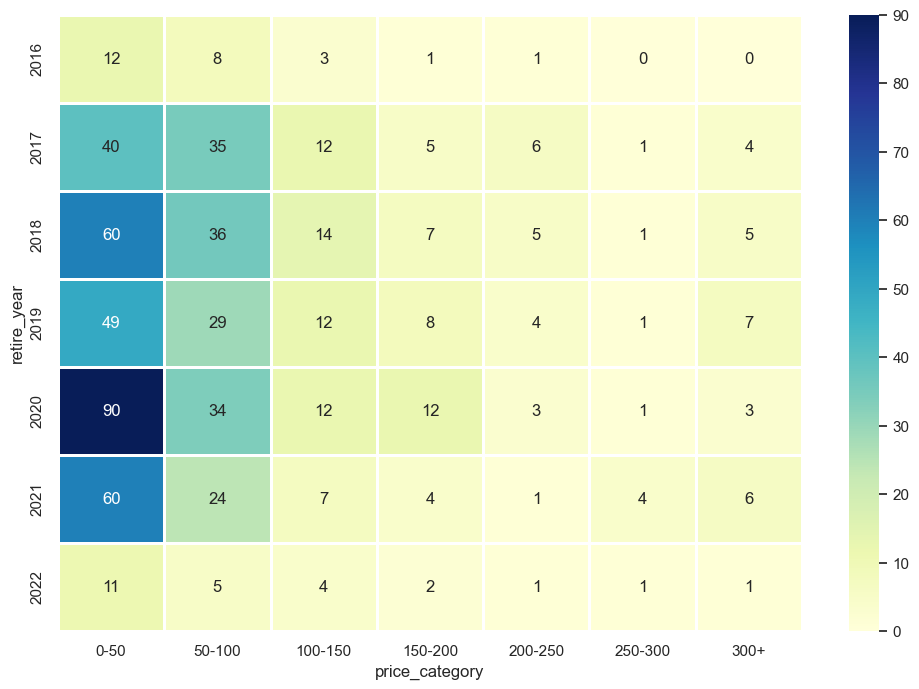

In [153]:
legoData['retire_year'] = pd.to_datetime(legoData['retire_month'], format='%b-%y').dt.year

heatmap_pivot = legoData.pivot_table(index='retire_year', columns='price_category', values='set_id', aggfunc='count', observed=False)

plt.figure(figsize=(12, 8))
sb.heatmap(data=heatmap_pivot, linewidths=1, annot=True, fmt='g', annot_kws={"size": 12}, cmap="YlGnBu")

### Packaging Vs Current Price

<Axes: xlabel='Packaging', ylabel='Current_Price'>

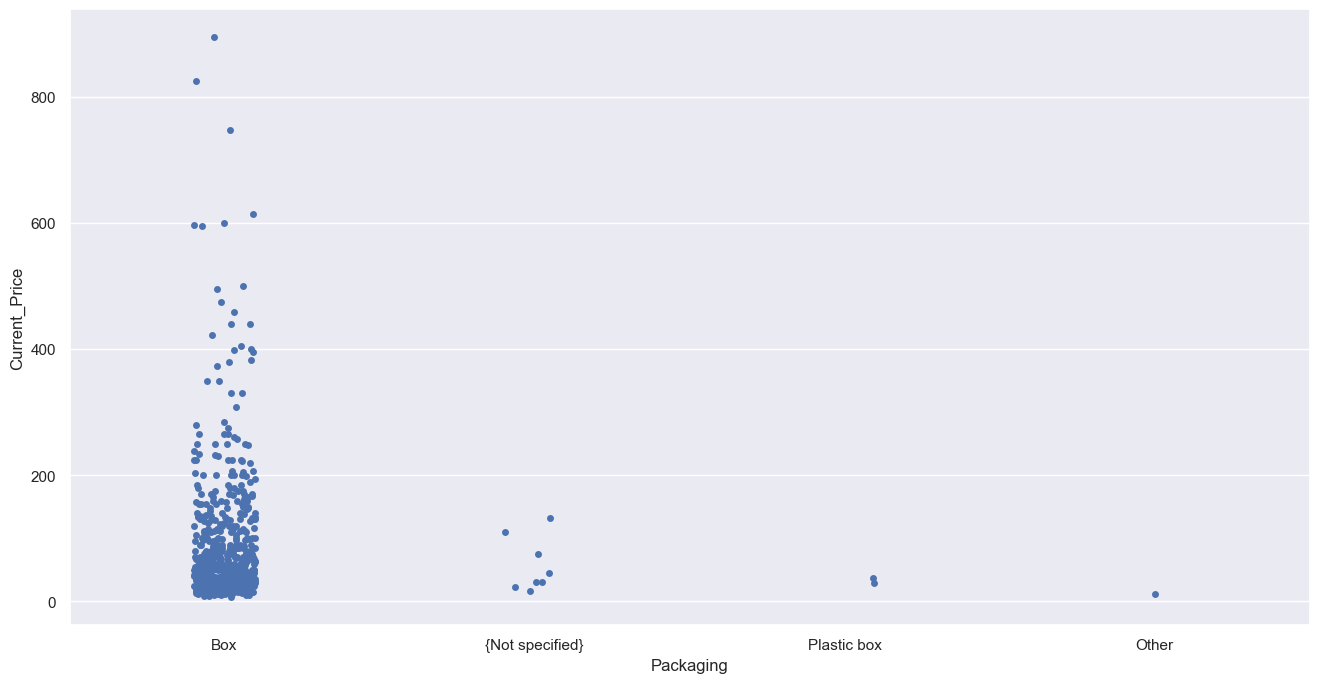

In [154]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Packaging', y = 'Current_Price', data = legoData)

/var/folders/rc/8c8k3z812kxdf3zyjm2fy4jc0000gn/T/ipykernel_14109/2592103018.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sb.heatmap(legoData.groupby(['Packaging', 'price_category']).size().unstack(),


<Axes: xlabel='price_category', ylabel='Packaging'>

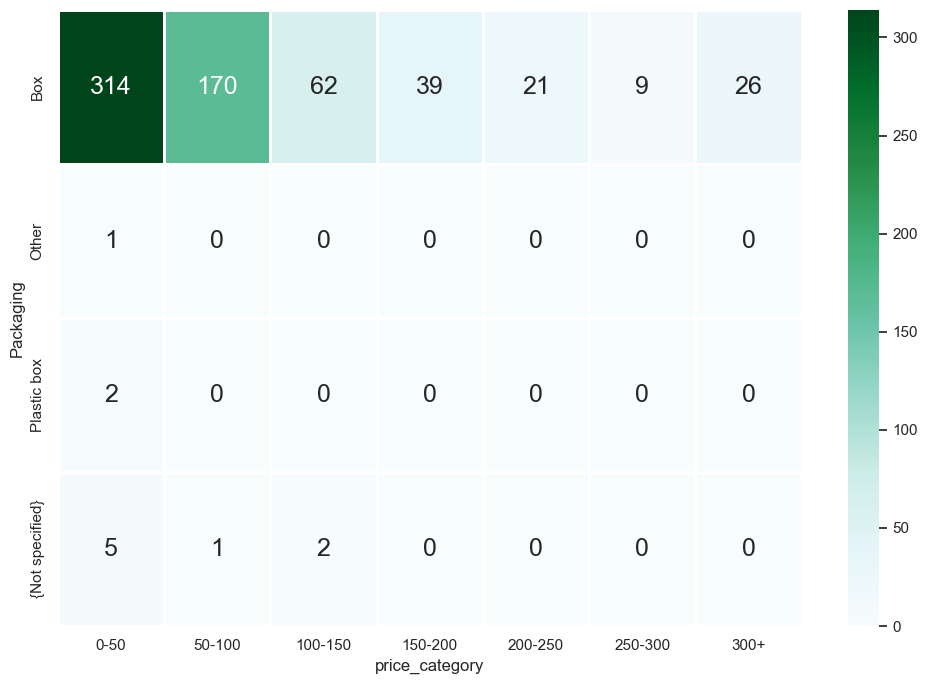

In [155]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(legoData.groupby(['Packaging', 'price_category']).size().unstack(),
           linewidths=1, annot=True, fmt='g', annot_kws={"size": 18}, cmap="BuGn")

### Availability Vs Current Price

<Axes: xlabel='Availability', ylabel='Current_Price'>

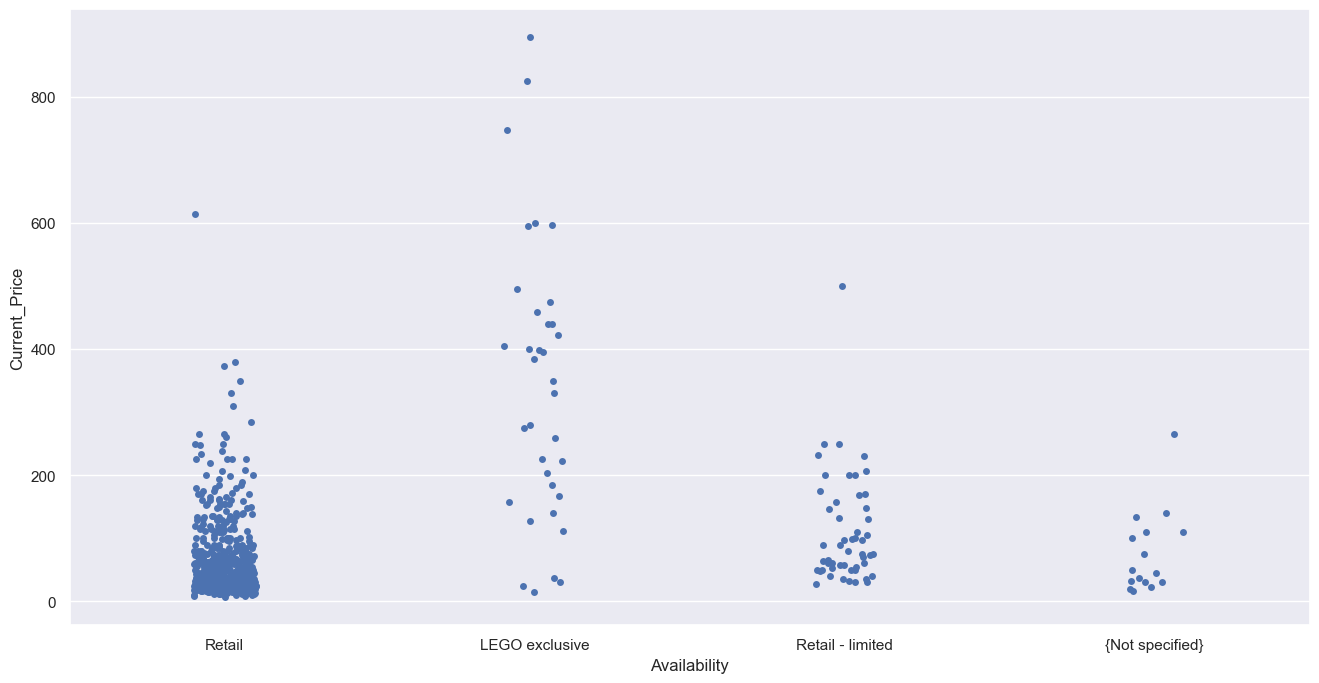

In [156]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Availability', y = 'Current_Price', data = legoData)

/var/folders/rc/8c8k3z812kxdf3zyjm2fy4jc0000gn/T/ipykernel_14109/129779762.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sb.heatmap(legoData.groupby(['Availability', 'price_category']).size().unstack(),


<Axes: xlabel='price_category', ylabel='Availability'>

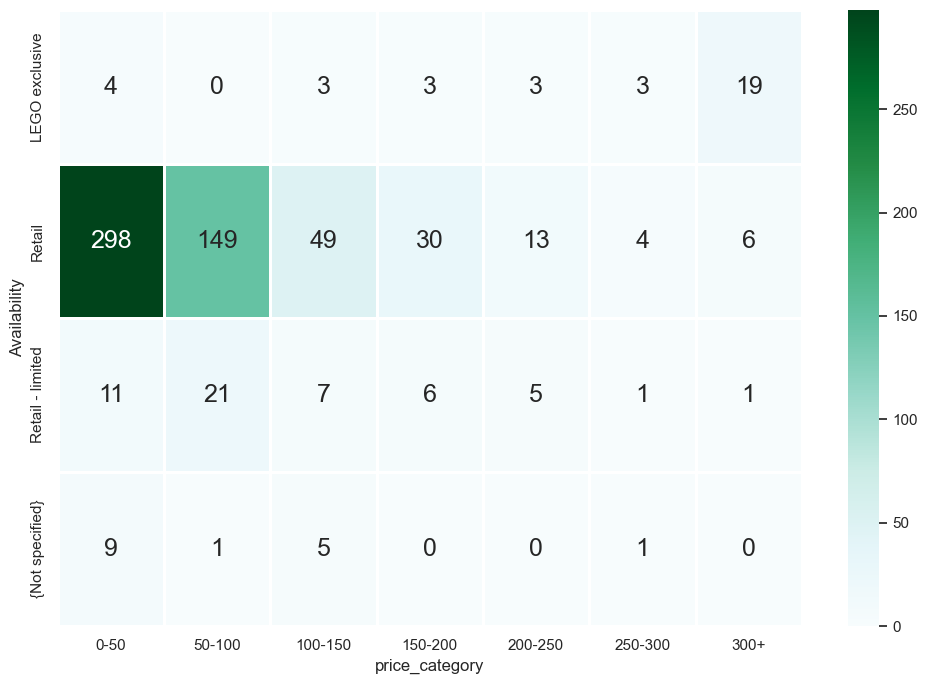

In [157]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(legoData.groupby(['Availability', 'price_category']).size().unstack(),
           linewidths=1, annot=True, fmt='g', annot_kws={"size": 18}, cmap="BuGn")